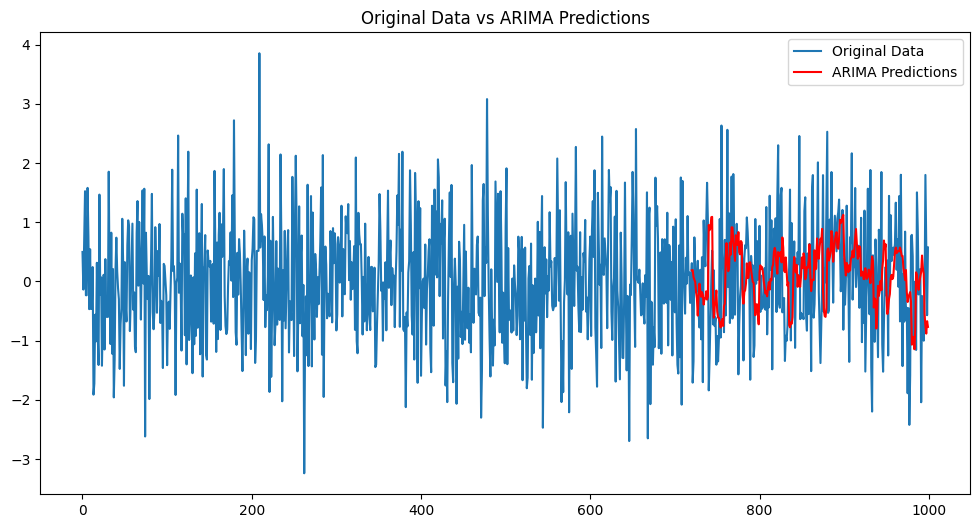

In [5]:
# 기존 데이터를 학습하고 예측된 데이터를 함께 시각화하는 코드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 데이터 준비 (랜덤 시계열 데이터 생성)
np.random.seed(42)
data = pd.Series(np.random.randn(1000))  # 1000개의 랜덤 데이터

# 슬라이딩 윈도우 ARIMA 함수
def sliding_window_arima(data, window_size, step_size):
    predictions = []
    prediction_index = []

    # 초기 윈도우 설정
    for i in range(0, len(data) - window_size, step_size):
        # 윈도우에 해당하는 데이터를 가져옴
        window_data = data[i:i + window_size]

        # ARIMA 모델 학습
        model = ARIMA(window_data, order=(5, 1, 0))  # (p,d,q) 파라미터
        model_fit = model.fit()

        # 미래 step_size만큼 예측
        forecast = model_fit.forecast(steps=step_size)

        # 예측 결과 저장
        predictions.extend(forecast)
        prediction_index.extend(range(i + window_size, i + window_size + step_size))

    return predictions, prediction_index

# 슬라이딩 윈도우 ARIMA 실행
window_size = 720  # 학습에 사용할 데이터 크기
step_size = 5     # 한 번 예측 시 10개의 데이터 예측
predictions, prediction_index = sliding_window_arima(data, window_size, step_size)

# 예측 데이터와 기존 데이터를 함께 시각화
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(prediction_index, predictions, color='red', label='ARIMA Predictions')
plt.title('Original Data vs ARIMA Predictions')
plt.legend()
plt.show()


0.1427304744720459


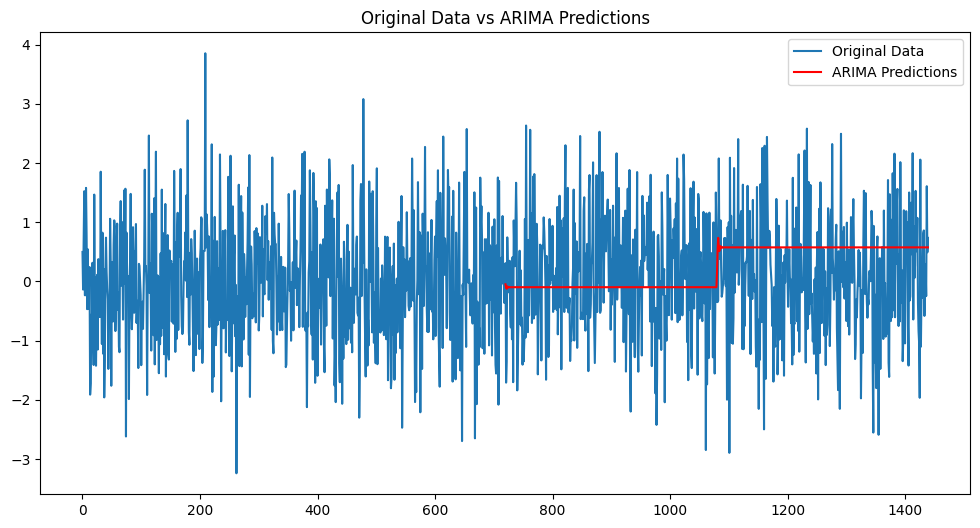

In [16]:
import time
from statsmodels.tsa.arima.model import ARIMA

# 데이터 준비 (랜덤 시계열 데이터 생성)
np.random.seed(42)
data = pd.Series(np.random.randn(1440))  # 1000개의 랜덤 데이터

# 슬라이딩 윈도우 ARIMA 모델 (최적화된 방식)
def optimized_sliding_window_arima(data, window_size, step_size):
    predictions = []
    prediction_index = []

    # 데이터 슬라이딩이 아닌 한 번 학습한 후 일정 구간에서만 예측
    model = ARIMA(data[:window_size], order=(3, 1, 0))  # p, d, q를 줄여서 간단한 모델 사용
    model_fit = model.fit()

    for i in range(0, len(data) - window_size, step_size):
        # 미래 step_size만큼 예측
        forecast = model_fit.forecast(steps=step_size)
        
        # 예측 결과 저장
        predictions.extend(forecast)
        prediction_index.extend(range(i + window_size, i + window_size + step_size))
        
        # 새로 추가된 데이터에 대해 모델 업데이트
        if i + window_size + step_size < len(data):
            model = ARIMA(data[i+step_size:i+step_size+window_size], order=(3, 1, 0))
            model_fit = model.fit()

    return predictions, prediction_index

# 시간 측정
start_time = time.time()

# 최적화된 슬라이딩 윈도우 ARIMA 실행
window_size = 720  # 학습에 사용할 데이터 크기
step_size = 360     # 한 번 예측 시 10개의 데이터 예측
predictions, prediction_index = optimized_sliding_window_arima(data, window_size, step_size)

end_time = time.time()
execution_time = end_time - start_time

print(execution_time)
# 예측 데이터와 기존 데이터를 함께 시각화
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data')
plt.plot(prediction_index, predictions, color='red', label='ARIMA Predictions')
plt.title('Original Data vs ARIMA Predictions')
plt.legend()
plt.show()


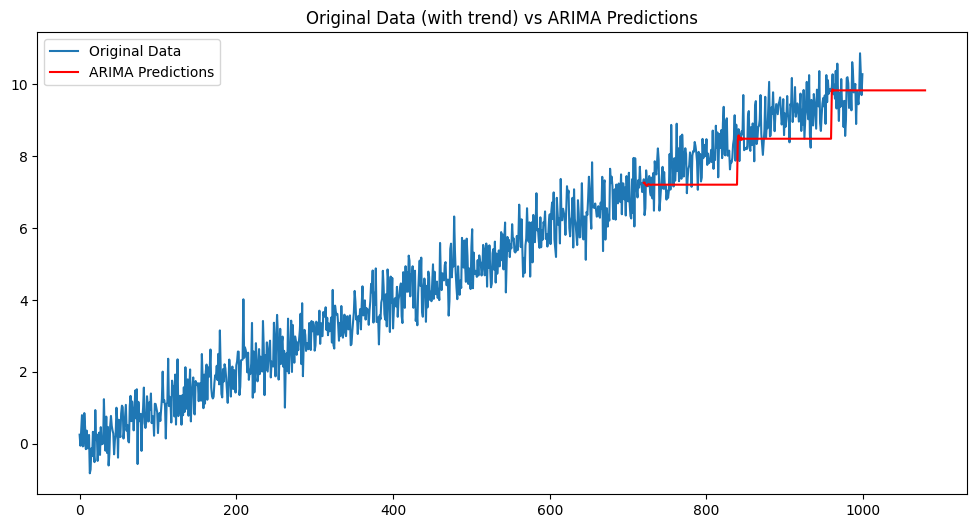

In [21]:
# 추세가 있는 데이터 생성 (예: 선형 증가 또는 감소)
np.random.seed(42)
trend_data = np.linspace(0, 10, 1000) + np.random.randn(1000) * 0.5  # 선형 증가에 약간의 노이즈 추가

# 최적화된 슬라이딩 윈도우 ARIMA 함수 다시 실행
window_size = 720  # 학습에 사용할 데이터 크기
step_size = 120     # 한 번 예측 시 10개의 데이터 예측
predictions, prediction_index = sliding_window_arima(pd.Series(trend_data), window_size, step_size)

# 예측 데이터와 기존 데이터를 함께 시각화
plt.figure(figsize=(12, 6))
plt.plot(trend_data, label='Original Data')
plt.plot(prediction_index, predictions, color='red', label='ARIMA Predictions')
plt.title('Original Data (with trend) vs ARIMA Predictions')
plt.legend()
plt.show()